In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from pandas.plotting import table
import seaborn as sns

%matplotlib inline
sns.set(color_codes=True)

In [2]:
trainDataDir = "dataset/two-sigma-connect-rental-listing-inquiries/train.json.zip"

In [3]:
trainData = pd.read_json(trainDataDir, convert_dates=['created'])
trainData = trainData.reset_index(drop=True)
trainData.count()

bathrooms          49352
bedrooms           49352
building_id        49352
created            49352
description        49352
display_address    49352
features           49352
latitude           49352
listing_id         49352
longitude          49352
manager_id         49352
photos             49352
price              49352
street_address     49352
interest_level     49352
dtype: int64

In [4]:
#pre-check for global nan and null value
trainData.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

# Missing value

Find and mark missing value as np.nan <br>

### Description and Features
Since features can be derived from description,<br>
only remove records without description and features

In [5]:
nullCheck = trainData[['features']]
#https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe
row1, column1 = np.where(nullCheck.applymap(lambda x: not x))
nullCheck = trainData[['description']]
row2, column2 = np.where(nullCheck.applymap(lambda x: not x))
a = pd.Index(row1)
b = pd.Index(row2)
c = a.intersection(b)
c.size

58

In [6]:
trainData = trainData.drop(c)

### Bathrooms

In [7]:
nullCheck = trainData[['bathrooms']]

In [8]:
nullCheck['bathrooms'].dtypes

dtype('float64')

In [9]:
nullCheck['bathrooms'].value_counts()

1.0     39368
2.0      7656
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
10.0        1
6.5         1
7.0         1
Name: bathrooms, dtype: int64

### Bedrooms

In [10]:
nullCheck = trainData[['bedrooms']]

In [11]:
nullCheck['bedrooms'].dtypes

dtype('int64')

In [12]:
nullCheck['bedrooms'].value_counts()

1    15727
2    14608
0     9464
3     7273
4     1926
5      246
6       46
8        2
7        2
Name: bedrooms, dtype: int64

### Building ID

In [13]:
nullCheck = trainData[['building_id']]

In [14]:
nullCheck['building_id'].value_counts()

0                                   8283
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
                                    ... 
bb72b607b36450f532607769fd09770c       1
552d4a90ef110e4a2f6ab0c510df0443       1
bf0237b404547e6629a61e7a06f9837f       1
3b887f72f1591f7b7850e4d314052b9c       1
747d2dc642fb599e932846f68dd1aa09       1
Name: building_id, Length: 7573, dtype: int64

In [15]:
trainData['building_id'] = trainData['building_id'].replace('0', np.nan)

### Created

In [16]:
nullCheck = trainData[['created']]

In [17]:
nullCheck['created'].value_counts()

2016-06-11 01:20:36    3
2016-05-02 03:41:36    3
2016-04-15 02:24:25    3
2016-05-17 14:29:08    3
2016-05-14 01:11:03    3
                      ..
2016-05-04 06:04:43    1
2016-04-19 02:33:30    1
2016-04-07 03:25:11    1
2016-06-24 07:24:56    1
2016-04-09 05:37:36    1
Name: created, Length: 48617, dtype: int64

In [18]:
row, column = np.where(nullCheck.applymap(lambda x: not x))
row.size

0

### Listing Id

In [19]:
nullCheck = trainData[['listing_id']]

In [20]:
nullCheck['listing_id'].value_counts()

6819838    1
6973772    1
6880501    1
7209390    1
7068913    1
          ..
7088688    1
7127597    1
7195180    1
7008811    1
7143424    1
Name: listing_id, Length: 49294, dtype: int64

### Latitude

In [21]:
nullCheck = trainData[['latitude']]

In [22]:
#Check zero
row, column = np.where(nullCheck.applymap(lambda x: x == 0))
row.size

12

In [23]:
trainData['latitude'] = trainData['latitude'].apply(lambda x: np.nan if x == 0 else x)

### Longitude

In [24]:
nullCheck = trainData[['longitude']]

In [25]:
#Check zero
row, column = np.where(nullCheck.applymap(lambda x: x == 0))
row.size

12

In [26]:
trainData['longitude'] = trainData['longitude'].apply(lambda x: np.nan if x == 0 else x)

### Manager Id

In [27]:
nullCheck = trainData[['manager_id']]
nullCheck.dtypes

manager_id    object
dtype: object

In [28]:
nullCheck['manager_id'].value_counts()

e6472c7237327dd3903b3d6f6a94515a    2532
6e5c10246156ae5bdcd9b487ca99d96a     711
8f5a9c893f6d602f4953fcc0b8e6e9b4     410
62b685cc0d876c3a1a51d63a0d6a8082     395
cb87dadbca78fad02b388dc9e8f25a5b     373
                                    ... 
f398f307789fc70a80e152a96d02712a       1
9fdbf904a7fc56abe396ab272b154885       1
927b67f1129f6404cd9168c42cb76ef0       1
7a9463349cbe429662215d14ba436b5b       1
1754109a5a0fd778626aff18c4060f97       1
Name: manager_id, Length: 3480, dtype: int64

In [29]:
#https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe
row, column = np.where(nullCheck.applymap(lambda x: x == ''))
row

array([], dtype=int64)

### Photos

In [30]:
nullCheck = trainData[['photos']]

In [31]:
#https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe
row, column = np.where(nullCheck.applymap(lambda x: not x))
row.size

3593

In [32]:
trainData['photos'] = trainData['photos'].apply(lambda x: np.nan if len(x) == 0 else x)

### Display Address

In [33]:
nullCheck = trainData[['display_address']]

In [34]:
#https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe
row, column = np.where(nullCheck.applymap(lambda x: not x))
row.size

134

In [35]:
trainData['display_address'] = trainData['display_address'].apply(lambda x: np.nan if not x else x)

### Street Address

In [36]:
nullCheck = trainData[['street_address']]

In [37]:
#https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe
row, column = np.where(nullCheck.applymap(lambda x: not x))
row.size

10

In [38]:
trainData['street_address'] = trainData['street_address'].apply(lambda x: np.nan if not x else x)

### Price

In [39]:
nullCheck = trainData[['price']]

In [40]:
nullCheck['price'].value_counts()

2500    1106
3200     881
3000     839
2700     775
2400     771
        ... 
7754       1
5717       1
7416       1
1243       1
2231       1
Name: price, Length: 2807, dtype: int64

### Interest Level

In [41]:
nullCheck = trainData[['interest_level']]

In [42]:
nullCheck['interest_level'].value_counts()

low       34248
medium    11216
high       3830
Name: interest_level, dtype: int64

# Summary

In [54]:
#check for nan and null value of all columns
missing_counts = trainData.isnull().sum()
df_missing_counts = pd.DataFrame(missing_counts, columns=['missing_value_counts'])
display(df_missing_counts)

,missing_value_counts
bathrooms,0
bedrooms,0
building_id,8283
created,0
description,0
display_address,134
features,0
latitude,12
listing_id,0
longitude,12


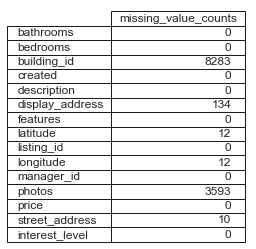

In [77]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_frame_on(False)  # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

# table(ax, df_missing_counts)
tabla = table(ax, df_missing_counts, loc='upper right', colWidths=[0.5])  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) # change size table
plt.savefig("figures_saved/table_missing-value-counts", transparent=True)

In [44]:
trainDataWithNaNDir = "dataset/two-sigma-connect-rental-listing-inquiries/trainNaN.json.zip"
trainData.to_json(trainDataWithNaNDir)